In [ ]:
# importing packages #
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR, SVC
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

# neglect warning #
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('Group11_FinalReport_DS2_2022.csv')
df = df.iloc[2: , :]

In [ ]:
df=df[df.columns]
df.shape



(17280, 116)

Renaming of the columns with powerplant terms

In [ ]:
df.rename(columns={'1CHC00GH902':'GENERATOR MW',
'NumDisp.9882':'TOTAL COAL FLOW BEF CAL CORR',
'MPS02-MSS-TAF-03':'TOTAL AIR FLOW(t/h)',
'1HAD01CP902':'FURNACE DRAFT PRESS',
'1HLA51CG771XQ01':'AA (L) CRNR 1 AA DMPR  FB',
'1HLA52CG771XQ01':'AA (L) CRNR 2 AA DMPR  FB',
'1HLA53CG771XQ01':'AA (L) CRNR 3 AA DMPR FB',
'1HLA54CG771XQ01':'AA (L) CRNR 4 AA DMPR FB',
'1HLA55CG771XQ01':'AA (L) CRNR 5 AA DMPR FB',
'1HLA56CG771XQ01':'AA (L) CRNR 6 AA DMPR FB',
'1HLA57CG771XQ01':'AA (L) CRNR 7 AA DMPR FB',
'1HLA58CG771XQ01':'AA (L) CRNR 8 AA DMPR FB',
'MPS01-WFR2-02-01':'WTR FUEL RATIO',
'1LAE01CF901_CP':'1RY SH DSH FW FLOW',
'1LAE01CF902':'2RY SH DSH FW FLOW',
'Unnamed: 15':'RH ECO O/L FLUE GAS DMPR',
'Unnamed: 16':'SH ECO O/L FLUE GAS DMPR ',
'1HAD01CP157XQ01':'WIND BOX and FURNACE DP 1',
'1HAD01CP158XQ01':'WIND BOX and FURNACE DP 2',
'1HHA51CG701XQ01':'1CORNER BURNER TILTING DRIVE  FB(deg)',
'1HHA52CG701XQ01':'2CORNER BURNER TILTING DRIVE FB(deg)',
'1HHA53CG701XQ01':'3CORNER BURNER TILTING DRIVE FB(deg)',
'1HHA54CG701XQ01':'4CORNER BURNER TILTING DRIVE FB(deg)',
'1HHA55CG701XQ01':'5CORNER BURNER TILTING DRIVE FB(deg)',
'1HHA56CG701XQ01':'6CORNER BURNER TILTING DRIVE FB(deg)',
'1HHA57CG701XQ01':'7CORNER BURNER TILTING DRIVE FB(deg)',
'1HHA58CG701XQ01':'8CORNER BURNER TILTING DRIVE FB(deg)',
'1LBA01CT911':'MS LINE A TEMP',
'1LBA01CT951':'MS LINE B TEMP',
'1HAD01CT906':'WW O/L RHT TEMP',
'1HAD01CT956':'WW O/L LFT TEMP',
'1HLA51CG712XQ01':'COAL BNR A CRNR 1 CNTRL DMPR POS',
'1HLA51CG712XQ02':'COAL BNR A CRNR 1 CNTRL DMPR POS.1',
'1HLA51CG712XQ03':'COAL BNR A CRNR 1 CNTRL DMPR POS.2',
'1HLA51CG712XQ04':'COAL BNR A CRNR 1 CNTRL DMPR POS.3',
'1HLA51CG712XQ05':'COAL BNR A CRNR 1 CNTRL DMPR POS.4',
'1HLA51CG712XQ06':'COAL BNR A CRNR 1 CNTRL DMPR POS.5',
'1HLA51CG712XQ07':'COAL BNR A CRNR 1 CNTRL DMPR POS.6',
'1HLA51CG712XQ08':'COAL BNR A CRNR 1 CNTRL DMPR POS.7',
'1HLA51CG712XQ09':'COAL BNR A CRNR 1 CNTRL DMPR POS.8',
'1HLA51CG712XQ10':'COAL BNR A CRNR 1 CNTRL DMPR POS.9',
'1HLA51CG712XQ11':'COAL BNR A CRNR 1 CNTRL DMPR POS.10',
'1HLA51CG712XQ12':'COAL BNR A CRNR 1 CNTRL DMPR POS.11',
'1HLA51CG712XQ13':'COAL BNR A CRNR 1 CNTRL DMPR POS.12',
'1HLA51CG712XQ14':'COAL BNR A CRNR 1 CNTRL DMPR POS.13',
'1HLA51CG712XQ15':'COAL BNR A CRNR 1 CNTRL DMPR POS.14',
'1HLA51CG712XQ16':'COAL BNR A CRNR 1 CNTRL DMPR POS.15',
'1HLA51CG712XQ17':'COAL BNR A CRNR 1 CNTRL DMPR POS.16',
'1HLA51CG712XQ18':'COAL BNR A CRNR 1 CNTRL DMPR POS.17',
'1HLA51CG712XQ19':'COAL BNR A CRNR 1 CNTRL DMPR POS.18',
'1HLA51CG712XQ20':'COAL BNR A CRNR 1 CNTRL DMPR POS.19',
'1HLA51CG712XQ21':'COAL BNR A CRNR 1 CNTRL DMPR POS.20',
'1HLA51CG712XQ22':'COAL BNR A CRNR 1 CNTRL DMPR POS.21',
'1HLA51CG712XQ23':'COAL BNR A CRNR 1 CNTRL DMPR POS.22',
'1HLA51CG712XQ24':'COAL BNR A CRNR 1 CNTRL DMPR POS.23',
'1HLA51CG712XQ25':'COAL BNR A CRNR 1 CNTRL DMPR POS.24',
'1HLA51CG712XQ26':'COAL BNR A CRNR 1 CNTRL DMPR POS.25',
'1HLA51CG712XQ27':'COAL BNR A CRNR 1 CNTRL DMPR POS.26',
'1HLA51CG712XQ28':'COAL BNR A CRNR 1 CNTRL DMPR POS.27',
'1HLA51CG712XQ29':'COAL BNR A CRNR 1 CNTRL DMPR POS.28',
'1HLA51CG712XQ30':'COAL BNR A CRNR 1 CNTRL DMPR POS.29',
'1HLA51CG712XQ31':'COAL BNR A CRNR 1 CNTRL DMPR POS.30',
'1HLA51CG712XQ32':'COAL BNR A CRNR 1 CNTRL DMPR POS.31',
'1HLA51CG712XQ33':'COAL BNR A CRNR 1 CNTRL DMPR POS.32',
'1HLA51CG712XQ34':'COAL BNR A CRNR 1 CNTRL DMPR POS.33',
'1HLA51CG712XQ35':'COAL BNR A CRNR 1 CNTRL DMPR POS.34',
'1HLA51CG712XQ36':'COAL BNR A CRNR 1 CNTRL DMPR POS.35',
'1HLA51CG712XQ37':'COAL BNR A CRNR 1 CNTRL DMPR POS.36',
'1HLA51CG712XQ38':'COAL BNR A CRNR 1 CNTRL DMPR POS.37',
'1HLA51CG712XQ39':'COAL BNR A CRNR 1 CNTRL DMPR POS.38',
'1HLA51CG712XQ40':'COAL BNR A CRNR 1 CNTRL DMPR POS.39',
'1HLA51CG712XQ41':'COAL BNR A CRNR 1 CNTRL DMPR POS.40',
'1HLA51CG712XQ42':'COAL BNR A CRNR 1 CNTRL DMPR POS.41',
'1HLA51CG712XQ43':'COAL BNR A CRNR 1 CNTRL DMPR POS.42',
'1HLA51CG712XQ44':'COAL BNR A CRNR 1 CNTRL DMPR POS.43',
'1HLA51CG712XQ45':'COAL BNR A CRNR 1 CNTRL DMPR POS.44',
'1HLA51CG712XQ46':'COAL BNR A CRNR 1 CNTRL DMPR POS.45',
'1HLA51CG712XQ47':'COAL BNR A CRNR 1 CNTRL DMPR POS.46',
'1HLA51CG712XQ48':'COAL BNR A CRNR 1 CNTRL DMPR POS.47',
'1HLA51CG713XQ01':'HFO/LDO BNR AB CRNR 1 DMPR POS',
'1HLA52CG713XQ01':'HFO/LDO BNR AB CRNR 2 CNTRL DMPR POS',
'1HLA53CG713XQ01':'HFO/LDO BNR AB CRNR 3 DMPR POS',
'1HLA54CG713XQ01':'HFO/LDO BNR AB CRNR 4 CNTRL DMPR POS',
'1HLA55CG713XQ01':'HFO/LDO BNR AB CRNR 5 CNTRL DMPR POS',
'1HLA56CG713XQ01':'HFO/LDO BNR AB CRNR 6 CNTRL DMPR POS',
'1HLA57CG713XQ01':'HFO/LDO BNR AB CRNR 7 CNTRL DMPR POS',
'1HLA58CG713XQ01':'HFO/LDO BNR AB CRNR 8 CNTRL DMPR POS',
'1HLA51CG733XQ01':'HFO BNR CD CRNR 1 CNTRL DMPR POS',
'1HLA52CG733XQ01':'HFO BNR CD CRNR 2 CNTRL DMPR POS',
'1HLA53CG733XQ01':'HFO BNR CD CRNR 3 DMPR POS',
'1HLA54CG733XQ01':'HFO BNR CD CRNR 4 CNTRL DMPR POS',
'1HLA55CG733XQ01':'HFO BNR CD CRNR 5 CNTRL DMPR POS',
'1HLA56CG733XQ01':'HFO BNR CD CRNR 6 CNTRL DMPR POS',
'1HLA57CG733XQ01':'HFO BNR CD CRNR 7 CNTRL DMPR POS',
'1HLA58CG733XQ01':'HFO BNR CD CRNR 8 CNTRL DMPR POS',
'1HLA51CG753XQ01':'HFO BNR EF CRNR 1CNTRL DMPR POS',
'1HLA52CG753XQ01':'HFO BNR EF CRNR 2 CNTRL DMPR POS',
'1HLA54CG753XQ01':'HFO BNR EF CRNR 4 CNTRL DMPR POS',
'1HLA55CG753XQ01':'HFO BNR EF CRNR 5 CNTRL DMPR POS',
'1HLA56CG753XQ01':'HFO BNR EF CRNR 6 CNTRL DMPR POS',
'1HLA56CG753XQ01.1':'HFO BNR EF CRNR 6 CNTRL DMPR POS.1',
'1HLA57CG753XQ01':'HFO BNR EF CRNR 7 CNTRL DMPR POS',
'1HLA58CG753XQ01':'HFO BNR EF CRNR 8 CNTRL DMPR POS',
'1HAH02CT901':'2RY SH A I/L STM TEMP',
'1HAH02CT903':'2RY SH B I/L STM TEMP',
'1HAH02CT902':'2RY SH A O/L TEMP',
'1HAH02CT904':'2RY SH B O/L TEMP',
'1HAH03CT901':'3RY SH A I/L TEMP',
'1HAH03CT902':'3RY SH B I/L TEMP',
'1HAJ01CT001XQ01':'1RY RHTR O/L TEMP 1',
'1HAJ01CT051XQ01':'1RY RHTR O/L TEMP 2',
'1HAJ02CT901':'2RY RH-A I/L STM TEMP ',
'1HAJ02CT951':'2RY RH-B I/L STM TEMP',
'1LBB01CT902':'2RY RH-A O/L TEMP',
'1LBB01CT951':'2RY RH-B O/L TEMP',
'1LAF01CF151XQ01':'RH DSH FW FLOW'},inplace = True)

In [ ]:
df.head()

,GENERATOR MW,TOTAL COAL FLOW BEF CAL CORR,TOTAL AIR FLOW(t/h),FURNACE DRAFT PRESS,AA (L) CRNR 1 AA DMPR FB,AA (L) CRNR 2 AA DMPR FB,AA (L) CRNR 3 AA DMPR FB,AA (L) CRNR 4 AA DMPR FB,AA (L) CRNR 5 AA DMPR FB,AA (L) CRNR 6 AA DMPR FB,...,2RY SH B O/L TEMP,3RY SH A I/L TEMP,3RY SH B I/L TEMP,1RY RHTR O/L TEMP 1,1RY RHTR O/L TEMP 2,2RY RH-A I/L STM TEMP,2RY RH-B I/L STM TEMP,2RY RH-A O/L TEMP,2RY RH-B O/L TEMP,RH DSH FW FLOW
2,690.6,356,2361.1,-9.2,55.8,50.8,47.6,47.3,39.3,49.9,...,552.4,537.4,535.7,498.5,502.9,497.6,496.7,597.4,594.5,0
3,691,355.9,2357.4,-8.46,55.8,50.9,47.6,47.3,39.3,49.9,...,552.4,537.3,535.7,498.3,502.7,497.5,496.6,597.4,594.3,0
4,690.8,355.8,2359.6,-10.49,55.8,50.9,47.6,47.3,39.3,49.9,...,552.9,537.1,535.9,498.5,502.6,497.5,496.6,597.5,594.3,0
5,690.7,355.5,2358.5,-11.05,55.8,50.9,47.6,47.3,39.3,49.9,...,553.4,536.5,536.5,498.5,502.6,497.7,496.6,597.5,594.3,0
6,690.8,355.3,2355.9,-9.57,55.8,50.9,47.5,47.3,39.3,49.9,...,553.8,536.3,536.9,498.6,502.6,497.6,496.6,597.5,594.4,0


Removing the outliers:

(600.0, 725.0)

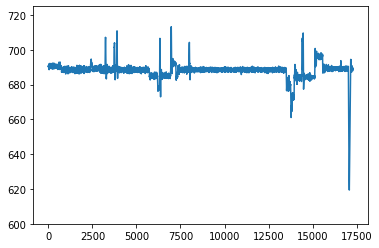

In [ ]:
df = df.astype(float)
df['GENERATOR MW'].plot()
plt.ylim((600, 725))


In [ ]:
for col in df.columns:
  mean = df[col].mean()
  median = df[col].median()
  std = df[col].std()
  df[col]= np.where(((df[col] - mean)/std).abs()>3,np.nan,df[col])
  df[col].fillna(method='ffill', inplace=True)



After removing outliers:

(600.0, 725.0)

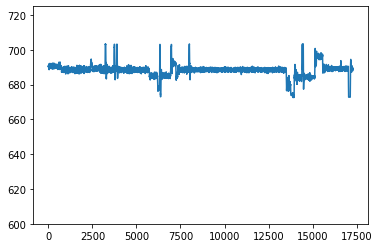

In [ ]:
df['GENERATOR MW'].plot()
plt.ylim((600, 725))


In [ ]:
for col in df.columns:
  print('for column {0} {1}'.format(col, df[col].isnull().values.any()))


for column GENERATOR MW False
for column TOTAL COAL FLOW BEF CAL CORR False
for column TOTAL AIR FLOW(t/h) False
for column FURNACE DRAFT PRESS False
for column AA (L) CRNR 1 AA DMPR  FB False
for column AA (L) CRNR 2 AA DMPR  FB False
for column AA (L) CRNR 3 AA DMPR FB False
for column AA (L) CRNR 4 AA DMPR FB False
for column AA (L) CRNR 5 AA DMPR FB False
for column AA (L) CRNR 6 AA DMPR FB False
for column AA (L) CRNR 7 AA DMPR FB False
for column AA (L) CRNR 8 AA DMPR FB False
for column WTR FUEL RATIO False
for column 1RY SH DSH FW FLOW False
for column 2RY SH DSH FW FLOW False
for column RH ECO O/L FLUE GAS DMPR False
for column SH ECO O/L FLUE GAS DMPR  False
for column WIND BOX and FURNACE DP 1 False
for column WIND BOX and FURNACE DP 2 False
for column 1CORNER BURNER TILTING DRIVE  FB(deg) False
for column 2CORNER BURNER TILTING DRIVE FB(deg) False
for column 3CORNER BURNER TILTING DRIVE FB(deg) False
for column 4CORNER BURNER TILTING DRIVE FB(deg) False
for column 5CORNER B

To check if the dataset contains Nan/Null values

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df = df.astype( str)
df.dtypes

GENERATOR MW                    object
TOTAL COAL FLOW BEF CAL CORR    object
TOTAL AIR FLOW(t/h)             object
FURNACE DRAFT PRESS             object
AA (L) CRNR 1 AA DMPR  FB       object
                                 ...  
2RY RH-A I/L STM TEMP           object
2RY RH-B I/L STM TEMP           object
2RY RH-A O/L TEMP               object
2RY RH-B O/L TEMP               object
RH DSH FW FLOW                  object
Length: 116, dtype: object

To check if the dataset contains any special characters

In [ ]:
for col in df.columns:
          print(df[df[col].str.contains(r'[@&$%+_]')])




Empty DataFrame
Columns: [GENERATOR MW, TOTAL COAL FLOW BEF CAL CORR, TOTAL AIR FLOW(t/h), FURNACE DRAFT PRESS, AA (L) CRNR 1 AA DMPR  FB, AA (L) CRNR 2 AA DMPR  FB, AA (L) CRNR 3 AA DMPR FB, AA (L) CRNR 4 AA DMPR FB, AA (L) CRNR 5 AA DMPR FB, AA (L) CRNR 6 AA DMPR FB, AA (L) CRNR 7 AA DMPR FB, AA (L) CRNR 8 AA DMPR FB, WTR FUEL RATIO, 1RY SH DSH FW FLOW, 2RY SH DSH FW FLOW, RH ECO O/L FLUE GAS DMPR, SH ECO O/L FLUE GAS DMPR , WIND BOX and FURNACE DP 1, WIND BOX and FURNACE DP 2, 1CORNER BURNER TILTING DRIVE  FB(deg), 2CORNER BURNER TILTING DRIVE FB(deg), 3CORNER BURNER TILTING DRIVE FB(deg), 4CORNER BURNER TILTING DRIVE FB(deg), 5CORNER BURNER TILTING DRIVE FB(deg), 6CORNER BURNER TILTING DRIVE FB(deg), 7CORNER BURNER TILTING DRIVE FB(deg), 8CORNER BURNER TILTING DRIVE FB(deg), MS LINE A TEMP, MS LINE B TEMP, WW O/L RHT TEMP, WW O/L LFT TEMP, COAL BNR A CRNR 1 CNTRL DMPR POS, COAL BNR A CRNR 1 CNTRL DMPR POS.1, COAL BNR A CRNR 1 CNTRL DMPR POS.2, COAL BNR A CRNR 1 CNTRL DMPR POS.3, CO

In [ ]:
df = df.astype(float)
df.dtypes
df.to_csv('Data_cleaned.csv', index=False)

Inputs and Outputs selection:

In [ ]:
df.head()
x1 = df.copy()
x1.head()


,GENERATOR MW,TOTAL COAL FLOW BEF CAL CORR,TOTAL AIR FLOW(t/h),FURNACE DRAFT PRESS,AA (L) CRNR 1 AA DMPR FB,AA (L) CRNR 2 AA DMPR FB,AA (L) CRNR 3 AA DMPR FB,AA (L) CRNR 4 AA DMPR FB,AA (L) CRNR 5 AA DMPR FB,AA (L) CRNR 6 AA DMPR FB,...,2RY SH B O/L TEMP,3RY SH A I/L TEMP,3RY SH B I/L TEMP,1RY RHTR O/L TEMP 1,1RY RHTR O/L TEMP 2,2RY RH-A I/L STM TEMP,2RY RH-B I/L STM TEMP,2RY RH-A O/L TEMP,2RY RH-B O/L TEMP,RH DSH FW FLOW
2,690.6,356.0,2361.1,-9.20,55.8,50.8,47.6,47.3,39.3,49.9,...,552.4,537.4,535.7,498.5,502.9,497.6,496.7,597.4,594.5,0.0
3,691.0,355.9,2357.4,-8.46,55.8,50.9,47.6,47.3,39.3,49.9,...,552.4,537.3,535.7,498.3,502.7,497.5,496.6,597.4,594.3,0.0
4,690.8,355.8,2359.6,-10.49,55.8,50.9,47.6,47.3,39.3,49.9,...,552.9,537.1,535.9,498.5,502.6,497.5,496.6,597.5,594.3,0.0
5,690.7,355.5,2358.5,-11.05,55.8,50.9,47.6,47.3,39.3,49.9,...,553.4,536.5,536.5,498.5,502.6,497.7,496.6,597.5,594.3,0.0
6,690.8,355.3,2355.9,-9.57,55.8,50.9,47.5,47.3,39.3,49.9,...,553.8,536.3,536.9,498.6,502.6,497.6,496.6,597.5,594.4,0.0


In [ ]:
y = df.iloc[:,103:116]
y['GENERATOR MW'] = df.iloc[:,0]
y['MS LINE A TEMP'] = df['MS LINE A TEMP']
y['MS LINE B TEMP'] =df['MS LINE B TEMP']
y['WW O/L RHT TEMP'] =df['WW O/L RHT TEMP']
y['WW O/L LFT TEMP']= df['WW O/L LFT TEMP']
y.shape

(17280, 18)

In [ ]:
for col in y.columns:
  x1.drop(columns=[col],inplace=True)

In [ ]:
x1.head()

,TOTAL COAL FLOW BEF CAL CORR,TOTAL AIR FLOW(t/h),FURNACE DRAFT PRESS,AA (L) CRNR 1 AA DMPR FB,AA (L) CRNR 2 AA DMPR FB,AA (L) CRNR 3 AA DMPR FB,AA (L) CRNR 4 AA DMPR FB,AA (L) CRNR 5 AA DMPR FB,AA (L) CRNR 6 AA DMPR FB,AA (L) CRNR 7 AA DMPR FB,...,HFO BNR CD CRNR 7 CNTRL DMPR POS,HFO BNR CD CRNR 8 CNTRL DMPR POS,HFO BNR EF CRNR 1CNTRL DMPR POS,HFO BNR EF CRNR 2 CNTRL DMPR POS,HFO BNR EF CRNR 4 CNTRL DMPR POS,HFO BNR EF CRNR 5 CNTRL DMPR POS,HFO BNR EF CRNR 6 CNTRL DMPR POS,HFO BNR EF CRNR 6 CNTRL DMPR POS.1,HFO BNR EF CRNR 7 CNTRL DMPR POS,HFO BNR EF CRNR 8 CNTRL DMPR POS
2,356.0,2361.1,-9.20,55.8,50.8,47.6,47.3,39.3,49.9,60.3,...,29.3,29.5,30.1,17.5,25.6,27.1,37.9,37.9,33.4,29.8
3,355.9,2357.4,-8.46,55.8,50.9,47.6,47.3,39.3,49.9,60.4,...,29.4,29.5,30.2,17.0,25.6,27.1,37.9,37.9,33.4,29.7
4,355.8,2359.6,-10.49,55.8,50.9,47.6,47.3,39.3,49.9,60.4,...,29.3,29.5,30.2,15.3,25.6,27.1,37.9,37.9,33.4,29.7
5,355.5,2358.5,-11.05,55.8,50.9,47.6,47.3,39.3,49.9,60.4,...,29.3,29.5,30.1,20.8,25.6,27.1,37.9,37.9,33.4,29.7
6,355.3,2355.9,-9.57,55.8,50.9,47.5,47.3,39.3,49.9,60.5,...,29.3,29.5,30.2,18.2,25.7,27.1,37.9,37.9,33.4,29.7


In [ ]:
X =x1
X = X.astype('float32')
y = y.astype(float)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)
X = X.astype('float32')

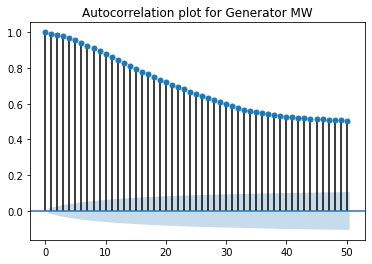

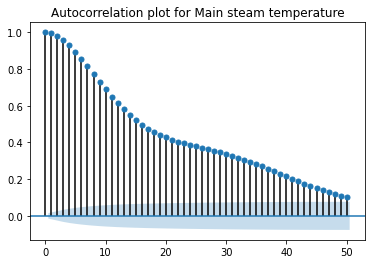

In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
series = df
generator_values = series['GENERATOR MW']
val2 = series['MS LINE A TEMP']
val3 = series['2RY RH-A O/L TEMP']
# generator_values = generator_values.drop(labels=[0,1], axis=0)
plot_acf(generator_values, lags=50)
pyplot.title('Autocorrelation plot for Generator MW')
pyplot.savefig('ACF plots for Generator MW.png')
plot_acf(val2, lags=50)
pyplot.title('Autocorrelation plot for Main steam temperature')
pyplot.savefig('ACF plots for Main steam temperature.png')
pyplot.show()

Data spliting:


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)


Deep Neural Network:

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
import tensorflow as tf



In [ ]:
# different structures of network have been checked , this one yields the optimal result #
# Neural network
model = Sequential()
model.add(Dense(60, input_dim=98, activation='sigmoid'))#input layer 
model.add(Dense(40, activation='sigmoid'))
model.add(Dense(25, activation='sigmoid'))
model.add(Dense(18,  activation=tf.keras.activations.linear)) #output layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                5940      
                                                                 
 dense_1 (Dense)             (None, 40)                2440      
                                                                 
 dense_2 (Dense)             (None, 25)                1025      
                                                                 
 dense_3 (Dense)             (None, 18)                468       
                                                                 
Total params: 9,873
Trainable params: 9,873
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
from keras import backend as K

def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt,  metrics=[R2])

In [ ]:
history1 = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=200, batch_size= 500)

Epoch 1/200
25/25 [==============================] - 3s 10ms/step - loss: 1.0028 - R2: 0.0016 - val_loss: 0.8983 - val_R2: 0.0934
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 0.8394 - R2: 0.1684 - val_loss: 0.7385 - val_R2: 0.2544
Epoch 3/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6457 - R2: 0.3610 - val_loss: 0.5407 - val_R2: 0.4543
Epoch 4/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5084 - R2: 0.4973 - val_loss: 0.4627 - val_R2: 0.5329
Epoch 5/200
25/25 [==============================] - 0s 6ms/step - loss: 0.4536 - R2: 0.5487 - val_loss: 0.4267 - val_R2: 0.5694
Epoch 6/200
25/25 [==============================] - 0s 5ms/step - loss: 0.4166 - R2: 0.5868 - val_loss: 0.3894 - val_R2: 0.6072
Epoch 7/200
25/25 [==============================] - 0s 4ms/step - loss: 0.3837 - R2: 0.6173 - val_loss: 0.3600 - val_R2: 0.6367
Epoch 8/200
25/25 [==============================] - 0s 4ms/step - loss: 0.3578 - R2: 0.6439 - v

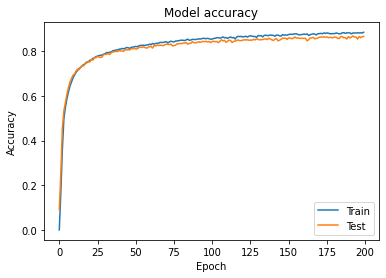

In [ ]:
plt.plot(history1.history['R2'])
plt.plot(history1.history['val_R2'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='bottom right')
plt.show()

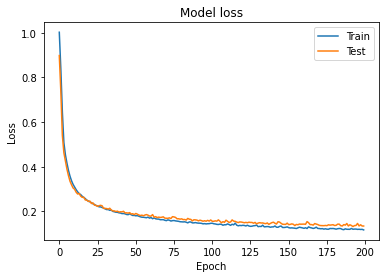

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='bottom right')
plt.show()

(0.0, 100.0)

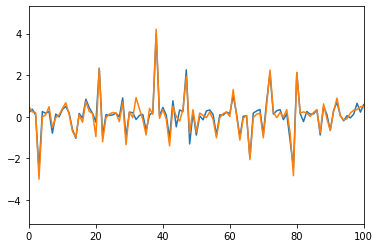

In [ ]:
y_pred = model.predict(X_test)
plt.plot(y_pred[:,13])
plt.plot(y_test[:,13])
plt.xlim([0,100])

(0.0, 100.0)

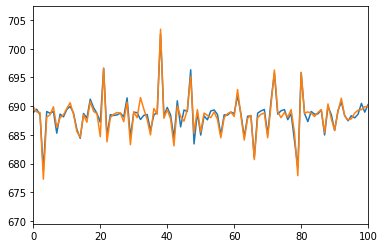

In [ ]:
y_a = sc.inverse_transform(y_test)[:, [13]]
y_t = sc.inverse_transform(y_pred)[:, [13]]
plt.plot(y_t)
plt.plot(y_a)
plt.xlim([0,100])

since the loss was still higher we proceeded with CNN & RNN further.

Energy optimization using Convolutional Neural Network (CNN)


In [ ]:
import tensorflow as tf
from keras import backend as K

def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


Simple CNN architecture

In [ ]:
model_2 = Sequential()
model_2.add(tf.keras.layers.Conv1D(32, kernel_size=8, activation='relu', padding='same', input_shape=(98, 1)))
model_2.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model_2.add(tf.keras.layers.Conv1D(64, kernel_size=5, activation='relu'))
model_2.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dense(64, activation='relu'))
model_2.add(tf.keras.layers.Dense(18))
model_2.summary()
model_2.compile(loss="mse", optimizer="Adam", metrics=[R2])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 98, 32)            288       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 45, 64)            10304     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 22, 64)           0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 1408)              0         
                                                                 
 dense (Dense)               (None, 64)                9

In [ ]:
history_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=200)

Epoch 1/200
66/66 [==============================] - 3s 31ms/step - loss: 0.6331 - R2: 0.3667 - val_loss: 0.4440 - val_R2: 0.5572
Epoch 2/200
66/66 [==============================] - 2s 28ms/step - loss: 0.3766 - R2: 0.6220 - val_loss: 0.3442 - val_R2: 0.6568
Epoch 3/200
66/66 [==============================] - 2s 26ms/step - loss: 0.3190 - R2: 0.6797 - val_loss: 0.3211 - val_R2: 0.6798
Epoch 4/200
66/66 [==============================] - 2s 26ms/step - loss: 0.2926 - R2: 0.7080 - val_loss: 0.2922 - val_R2: 0.7087
Epoch 5/200
66/66 [==============================] - 2s 27ms/step - loss: 0.2728 - R2: 0.7267 - val_loss: 0.2785 - val_R2: 0.7220
Epoch 6/200
66/66 [==============================] - 2s 27ms/step - loss: 0.2573 - R2: 0.7401 - val_loss: 0.2658 - val_R2: 0.7349
Epoch 7/200
66/66 [==============================] - 2s 27ms/step - loss: 0.2455 - R2: 0.7545 - val_loss: 0.2596 - val_R2: 0.7409
Epoch 8/200
66/66 [==============================] - 2s 27ms/step - loss: 0.2383 - R2: 0.7

In [ ]:
test_loss, test_acc = model_2.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

88/88 [==============================] - 0s 5ms/step - loss: 0.1148 - R2: 0.8836
Test accuracy: 0.8835675716400146
Test loss: 0.11483175307512283


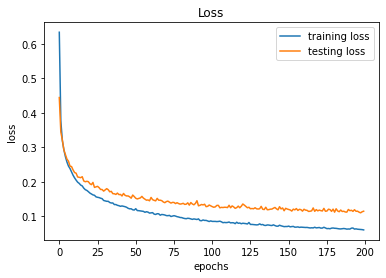

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_2.history['loss'], label='training loss')
plt.plot(history_2.history['val_loss'], label='testing loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
# plt.ylim(0, 10)
plt.legend()

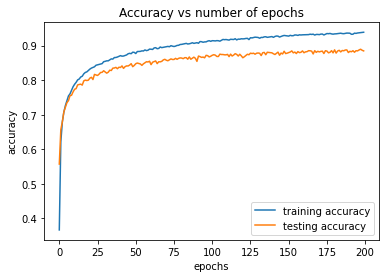

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_2.history['R2'], label='training accuracy')
plt.plot(history_2.history['val_R2'], label='testing accuracy')
plt.title('Accuracy vs number of epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
# plt.ylim(-15, 1)
plt.legend()

In [ ]:
# X_t = sc.inverse_transform(X_test)
y_t = sc.inverse_transform(y_test)
X_limited_pts = X_test[2700:]
y_limited_pts = y_t[2700:]
# y_limited_pts_arr = y_limited_pts.to_numpy()
X_limited_pts.shape

(98, 98)

No handles with labels found to put in legend.


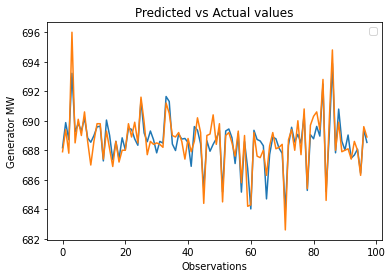

In [ ]:
y_pred = model_2.predict(X_limited_pts)
y_pred = sc.inverse_transform(y_pred)
plt.plot(y_pred[:,13])
plt.plot(y_limited_pts[:,13])
plt.title('Predicted vs Actual values')
plt.xlabel('Observations')
plt.ylabel('Generator MW')
plt.legend()
plt.savefig('Predicted vs actual values for Generator MW')

No handles with labels found to put in legend.


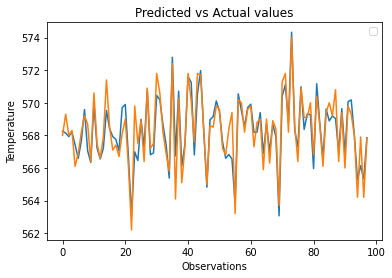

In [ ]:
y_pred = model_2.predict(X_limited_pts)
y_pred = sc.inverse_transform(y_pred)
plt.plot(y_pred[:,15])
plt.plot(y_limited_pts[:,15])
plt.title('Predicted vs Actual values')
plt.xlabel('Observations')
plt.ylabel('Temperature')
plt.legend()
plt.savefig('Predicted vs actual values for Temperature')

ResNet architecture for Conv1D

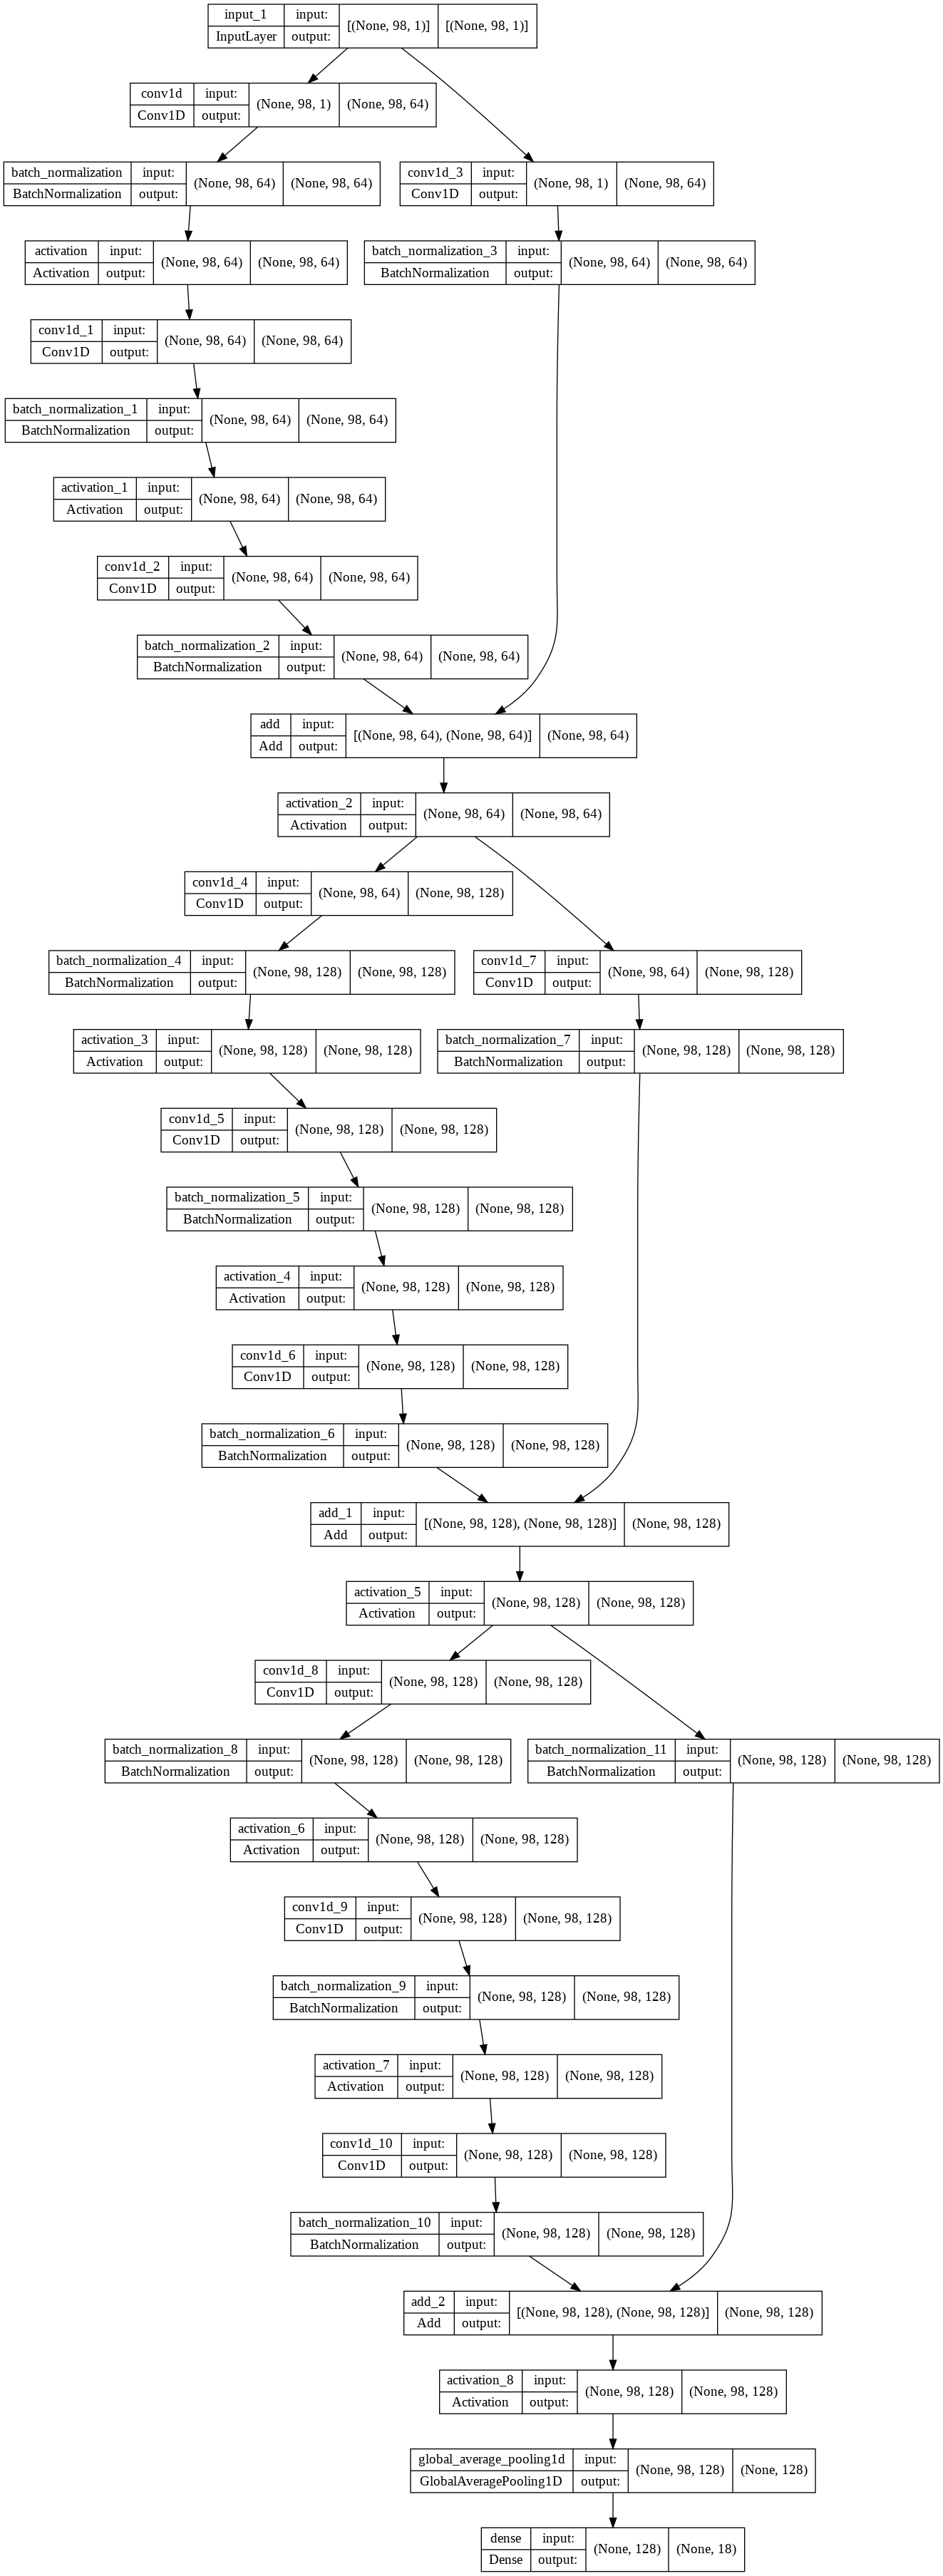

In [ ]:
from keras.utils.vis_utils import plot_model
input_layer = tf.keras.layers.Input(shape=(98, 1))

# BLOCK 1

conv_x = tf.keras.layers.Conv1D(filters=64, kernel_size=8, padding='same')(input_layer)
conv_x = tf.keras.layers.BatchNormalization()(conv_x)
conv_x = tf.keras.layers.Activation('relu')(conv_x)
conv_y = tf.keras.layers.Conv1D(filters=64, kernel_size=5, padding='same')(conv_x)
conv_y = tf.keras.layers.BatchNormalization()(conv_y)
conv_y = tf.keras.layers.Activation('relu')(conv_y)
conv_z = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding='same')(conv_y)
conv_z = tf.keras.layers.BatchNormalization()(conv_z)
shortcut_residuals = tf.keras.layers.Conv1D(filters=64, kernel_size=1, padding='same')(input_layer)
shortcut_residuals = tf.keras.layers.BatchNormalization()(shortcut_residuals)
output_block_1 = tf.keras.layers.add([shortcut_residuals, conv_z])
output_block_1 = tf.keras.layers.Activation('relu')(output_block_1)

# BLOCK 2

conv_x = tf.keras.layers.Conv1D(filters=128, kernel_size=8, padding='same')(output_block_1)
conv_x = tf.keras.layers.BatchNormalization()(conv_x)
conv_x = tf.keras.layers.Activation('relu')(conv_x)
conv_y = tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding='same')(conv_x)
conv_y = tf.keras.layers.BatchNormalization()(conv_y)
conv_y = tf.keras.layers.Activation('relu')(conv_y)
conv_z = tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding='same')(conv_y)
conv_z = tf.keras.layers.BatchNormalization()(conv_z)
shortcut_residuals = tf.keras.layers.Conv1D(filters=128, kernel_size=1, padding='same')(output_block_1)
shortcut_residuals = tf.keras.layers.BatchNormalization()(shortcut_residuals)
output_block_2 = tf.keras.layers.add([shortcut_residuals, conv_z])
output_block_2 = tf.keras.layers.Activation('relu')(output_block_2)

# BLOCK 3

conv_x = tf.keras.layers.Conv1D(filters=128, kernel_size=8, padding='same')(output_block_2)
conv_x = tf.keras.layers.BatchNormalization()(conv_x)
conv_x = tf.keras.layers.Activation('relu')(conv_x)
conv_y = tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding='same')(conv_x)
conv_y = tf.keras.layers.BatchNormalization()(conv_y)
conv_y = tf.keras.layers.Activation('relu')(conv_y)
conv_z = tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding='same')(conv_y)
conv_z = tf.keras.layers.BatchNormalization()(conv_z)
shortcut_residuals = tf.keras.layers.BatchNormalization()(output_block_2)
output_block_3 = tf.keras.layers.add([shortcut_residuals, conv_z])
output_block_3 = tf.keras.layers.Activation('relu')(output_block_3)
gap_layer = tf.keras.layers.GlobalAveragePooling1D()(output_block_3)
output_layer = tf.keras.layers.Dense(18)(gap_layer)
model_9 = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
opt = tf.keras.optimizers.Adam()
model_9.compile(optimizer=opt, loss='mse', metrics=[R2])
plot_model(model_9, to_file='resnet_model_plot_another.png', show_shapes=True, show_layer_names=True)

In [ ]:
history_9 = model_9.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=200)

Epoch 1/200
121/121 [==============================] - 30s 80ms/step - loss: 0.4786 - R2: 0.5218 - val_loss: 1.0598 - val_R2: -0.0708
Epoch 2/200
121/121 [==============================] - 4s 32ms/step - loss: 0.2752 - R2: 0.7248 - val_loss: 1.0197 - val_R2: -0.0312
Epoch 3/200
121/121 [==============================] - 4s 32ms/step - loss: 0.2299 - R2: 0.7698 - val_loss: 0.6244 - val_R2: 0.3689
Epoch 4/200
121/121 [==============================] - 4s 32ms/step - loss: 0.2036 - R2: 0.7956 - val_loss: 0.3251 - val_R2: 0.6700
Epoch 5/200
121/121 [==============================] - 4s 32ms/step - loss: 0.1841 - R2: 0.8158 - val_loss: 0.3404 - val_R2: 0.6536
Epoch 6/200
121/121 [==============================] - 4s 32ms/step - loss: 0.1682 - R2: 0.8313 - val_loss: 0.3187 - val_R2: 0.6756
Epoch 7/200
121/121 [==============================] - 4s 32ms/step - loss: 0.1577 - R2: 0.8419 - val_loss: 0.2443 - val_R2: 0.7515
Epoch 8/200
121/121 [==============================] - 4s 33ms/step - los

In [ ]:
test_loss, test_acc = model_9.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

162/162 [==============================] - 4s 19ms/step - loss: 0.0805 - R2: 0.9167
Test accuracy: 0.9166781306266785
Test loss: 0.08052604645490646


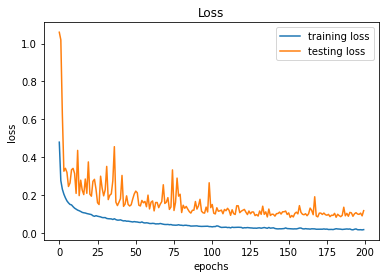

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_9.history['loss'], label='training loss')
plt.plot(history_9.history['val_loss'], label='testing loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
# plt.ylim(0, 10)
plt.legend()
plt.savefig('Training and testing loss for ResNet CNN.pdf')

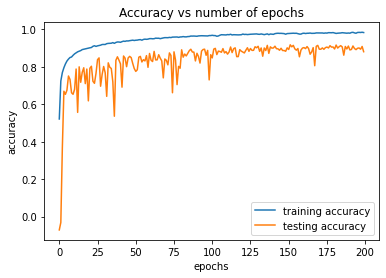

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_9.history['R2'], label='training accuracy')
plt.plot(history_9.history['val_R2'], label='testing accuracy')
plt.title('Accuracy vs number of epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
# plt.ylim(-15, 1)
plt.legend()
plt.savefig('Training and testing R2 scores for ResNet CNN.pdf')

In [ ]:
# X_t = sc.inverse_transform(X_test)
y_t = sc.inverse_transform(y_test)
X_limited_pts = X_test[5100:]
y_limited_pts = y_t[5100:]
# y_limited_pts_arr = y_limited_pts.to_numpy()
X_limited_pts.shape

(84, 98)

No handles with labels found to put in legend.


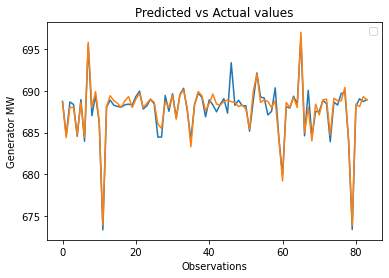

In [ ]:
y_pred = model_9.predict(X_limited_pts)
y_pred = sc.inverse_transform(y_pred)
plt.plot(y_pred[:,13])
plt.plot(y_limited_pts[:,13])
plt.title('Predicted vs Actual values')
plt.xlabel('Observations')
plt.ylabel('Generator MW')
plt.legend()
plt.savefig('Predicted vs actual values for Generator MW')


No handles with labels found to put in legend.


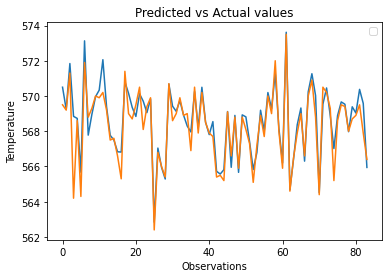

In [ ]:
y_pred = model_9.predict(X_limited_pts)
y_pred = sc.inverse_transform(y_pred)
plt.plot(y_pred[:,15])
plt.plot(y_limited_pts[:,15])
plt.title('Predicted vs Actual values')
plt.xlabel('Observations')
plt.ylabel('Temperature')
plt.legend()
plt.savefig('Predicted vs actual values for Temperature')

Recurrent Neural Network:


In [ ]:
X_RNN = X.reshape(17280, 1, 98)
print(X_RNN.shape)

(17280, 1, 98)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_RNN,y,test_size = 0.3,random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
model = Sequential()
model.add(LSTM(256, input_shape=X_RNN.shape[1:], activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(512, input_shape=X_RNN.shape[1:], activation='relu'))
model.add(Dropout(0.1))

# model.add(LSTM(256, input_shape=X_RNN.shape[1:], activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='relu'))
model.add(Dense(18, activation=tf.keras.activations.linear)) #output layer

In [ ]:
from keras import backend as K

def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

model.compile(
    loss='mse',
    optimizer=opt,
    metrics=R2,
)

history=model.fit(X_train,
          y_train, batch_size=500,
          epochs=200,
          validation_data=(X_test, y_test))

Epoch 1/200
25/25 [==============================] - 5s 56ms/step - loss: 0.8191 - R2: 0.1887 - val_loss: 0.6089 - val_R2: 0.3844
Epoch 2/200
25/25 [==============================] - 1s 24ms/step - loss: 0.5255 - R2: 0.4774 - val_loss: 0.4361 - val_R2: 0.5598
Epoch 3/200
25/25 [==============================] - 1s 23ms/step - loss: 0.4183 - R2: 0.5846 - val_loss: 0.3709 - val_R2: 0.6256
Epoch 4/200
25/25 [==============================] - 1s 23ms/step - loss: 0.3620 - R2: 0.6400 - val_loss: 0.3223 - val_R2: 0.6749
Epoch 5/200
25/25 [==============================] - 1s 25ms/step - loss: 0.3220 - R2: 0.6786 - val_loss: 0.2926 - val_R2: 0.7050
Epoch 6/200
25/25 [==============================] - 1s 23ms/step - loss: 0.2991 - R2: 0.7008 - val_loss: 0.2789 - val_R2: 0.7187
Epoch 7/200
25/25 [==============================] - 1s 23ms/step - loss: 0.2811 - R2: 0.7193 - val_loss: 0.2576 - val_R2: 0.7398
Epoch 8/200
25/25 [==============================] - 1s 23ms/step - loss: 0.2660 - R2: 0.7

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
mo

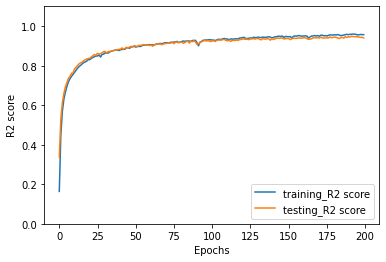

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['R2'], label='training_R2 score')
plt.plot(history.history['val_R2'], label='testing_R2 score')
#plt.title('R2 score')
plt.xlabel('Epochs')
plt.ylabel('R2 score')
plt.savefig('output.pdf', dpi=300, bbox_inches='tight')

plt.ylim(0,1.1)
plt.legend()

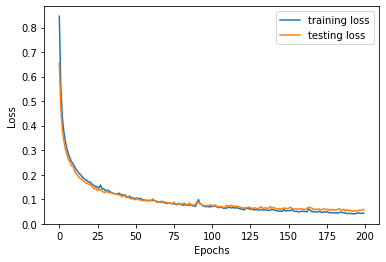

In [ ]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='testing loss')
#plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('outputloss.pdf', dpi=300, bbox_inches='tight')


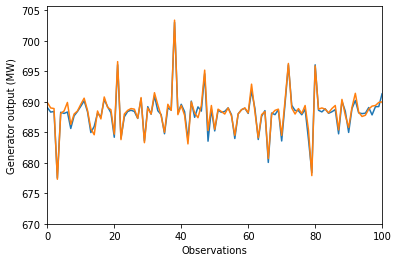

In [ ]:
a=sc.inverse_transform(y_pred)
b=sc.inverse_transform(y_test)

plt.plot(a[:, 13])
plt.plot(b[:, 13])
plt.xlim(0,100)

plt.xlabel('Observations')
plt.ylabel('Generator output (MW)')

plt.savefig('MW.pdf', dpi=300, bbox_inches='tight')

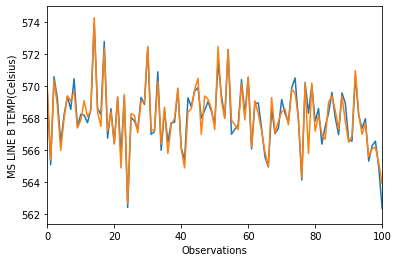

In [ ]:
a=sc.inverse_transform(y_pred)
b=sc.inverse_transform(y_test)

plt.plot(a[:, 15])
plt.plot(b[:, 15])
plt.xlim(0,100)

plt.xlabel('Observations')
plt.ylabel('MS LINE B TEMP(Celsius)')

plt.savefig('TEMP(Celsius).pdf', dpi=300, bbox_inches='tight')

End